In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# notebook dir
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
print('notebook_dir', notebook_dir)

# config auto reload
%load_ext autoreload
%autoreload 2

notebook_dir /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting


In [15]:
# controller = 'gpmpc_acados'
# prior = 'results/200_200_noise'
# controller = 'linear_mpc'
# prior = 'resultsaggresive_noise'
# controller = 'mpc_acados'
# prior = 'results_noise/temp'
# controller = 'ilqr'
# controller = 'linear_mpc_acados'
# controller = 'lqr'
# controller = 'pid'
controller = 'fmpc'
prior = 'results_noise'

max_seed = 9
metric_name = 'metrics.txt'
s = 2 # times std
obs_dim = 6

# get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_color = {'pid': 'gray', 
              'gpmpc_acados': colors[0], 
              'mpc_acados':colors[-1], 
              'linear_mpc':colors[2],
              'ilqr': 'slateblue',
              'lqr': 'blueviolet',
              'linear_mpc_acados': colors[2],
              'fmpc': colors[3]
              } 

In [3]:

data_folder_dir = f'../{controller}/{prior}/'
# find the folder in the dir
seed_data_folder = os.listdir(os.path.join(notebook_dir, data_folder_dir))
print('seed_data_folder', seed_data_folder)
seed_data_folder = [f for f in seed_data_folder if os.path.isdir(os.path.join(data_folder_dir, f))]
seed_data_folder = sorted(seed_data_folder, key=lambda x: int(x.split('_')[1]))
# print('seed_data_folder', seed_data_folder)
print('max seed', max_seed)
seed_data_folder = [seed_data_folder[i]+'/temp' for i in range(max_seed)]
# seed_data_folder = seed_data_folder[:9]
print('seed_data_folder', seed_data_folder)
seed_data_folder = [os.path.join(data_folder_dir, f) for f in seed_data_folder]
print('seed_data_folder', seed_data_folder)

seed_data_folder ['seed_9', 'noise_plot2.png', 'seed_1', 'seed_6', 'seed_7', 'seed_4', 'seed_2', 'seed_8', 'seed_10', 'seed_5', 'seed_3', 'noise_plot.png']
max seed 9
seed_data_folder ['seed_1/temp', 'seed_2/temp', 'seed_3/temp', 'seed_4/temp', 'seed_5/temp', 'seed_6/temp', 'seed_7/temp', 'seed_8/temp', 'seed_9/temp']
seed_data_folder ['../fmpc/results_noise/seed_1/temp', '../fmpc/results_noise/seed_2/temp', '../fmpc/results_noise/seed_3/temp', '../fmpc/results_noise/seed_4/temp', '../fmpc/results_noise/seed_5/temp', '../fmpc/results_noise/seed_6/temp', '../fmpc/results_noise/seed_7/temp', '../fmpc/results_noise/seed_8/temp', '../fmpc/results_noise/seed_9/temp']


In [4]:

results = {}

for seed in range(0, max_seed):
    results[repr(seed)] = {}
    rmse_list = []
    early_stop_list = []
    noise_factor_list = []
    traj_data_list = []
    traj_steps_list = []
    # fild runs
    load_seed_dir = seed_data_folder[seed]
    runs_data_folder = os.listdir(os.path.join(notebook_dir, load_seed_dir))
    runs_data_folder = [os.path.join(load_seed_dir, f) for f in runs_data_folder]
    # sort the runs
    runs_data_folder = sorted(runs_data_folder)
    print('runs_data_folder', runs_data_folder)
    for runs in runs_data_folder:
        # load the metric file in the folder
        metric_file = os.path.join(runs, metric_name)
        # print('metric_file', metric_file)
        data = pd.read_csv(metric_file, delimiter=':')
        # convert to numpy
        data = data.to_numpy()
        # print(data)
        # convert to dictionary
        data = {data[i][0]: data[i][1] for i in range(len(data))}

        noise_factor = eval(data['noise_factor'])
        rmse = eval(data['rmse'])
        early_stop = eval(data['early_stop'])
        rmse_list.append(rmse)
        early_stop_list.append(early_stop)
        noise_factor_list.append(noise_factor)

        # load the traj
        traj_file = os.path.join(runs, f'{controller}_data_quadrotor_traj_tracking.pkl')
        traj_data = pd.read_pickle(traj_file)
        traj_data = traj_data['trajs_data']['obs'][0]
        traj_steps = len(traj_data)
        traj_data_list.append(traj_data)
        traj_steps = len(traj_data)
        traj_steps_list.append(traj_steps)
    
    results[repr(seed)]['rmse'] = rmse_list
    results[repr(seed)]['early_stop'] = early_stop_list
    results[repr(seed)]['noise_factor'] = noise_factor_list
    # results[repr(seed)]['traj_data'] = traj_data_list
    results[repr(seed)]['traj_steps'] = traj_steps_list

max_noise_factor = max([max(results[repr(seed)]['noise_factor']) for seed in range(max_seed)])


runs_data_folder ['../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-55-45_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-55-49_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-55-53_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-55-57_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-01_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-05_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-09_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-12_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-16_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-20_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-24_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-28_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-35_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec-04-15-56-40_40bd49c', '../fmpc/results_noise/seed_1/temp/seed1_Dec

In [5]:
traj_data.shape

(661, 6)

In [6]:
# 

In [7]:
# results[repr(1)]['traj_steps']
# results.keys

# results_file_name = f'{notebook_dir}/../data/noise_results_{controller}.npy'
# np.save(results_file_name, results)
# print(f'saved {notebook_dir}/{results_file_name}')


In [8]:
# results[repr(1)]['rmse']
for seed in range(max_seed):
    print(f'seed {seed} rmse {results[repr(seed)]["rmse"]}')
    print(len(results[repr(seed)]["rmse"]))
    # print(f'seed {seed} early_stop {results[repr(seed)]["early_stop"]}')
    # print(f'seed {seed} noise_factor {results[repr(seed)]["noise_factor"]}')
    # print(f'seed {seed} traj_steps {results[repr(seed)]["traj_steps"]}')
    print('')

seed 0 rmse [0.05788360991968249, 0.05477552485971183, 0.053893722246443496, 0.055439205060084214, 0.057929723371893525, 0.06122227022651964, 0.06596720382493367, 0.07215938296882439, 0.07950460938001624, 0.08795772229902975, 0.09659449943662832, 0.10581833568839631, 0.11558200987736936, 0.12595162016451783, 0.1366669692561757, 0.14828181791447284, 0.16135753667524344, 0.175602587643779, 0.19209263206229493, 0.2103111594083773, 0.22948059607376808]
21

seed 1 rmse [0.057003883278527796, 0.05504453172274919, 0.0568185734020311, 0.0631386382184888, 0.07337538525966632, 0.08598340408144543, 0.09938606065856247, 0.11315018991362542, 0.12802993291344997, 0.1438336759229518, 0.16104112867953285, 0.17974313171530995, 0.19816134325327953, 0.21893752755093235, 0.2420141062931524, 0.26555421925274836, 0.2882481513908276, 0.31191607898801565, 0.3372599501351138, 0.36204920752254044, 0.3864980814684535]
21

seed 2 rmse [0.06007305224724435, 0.058100180125975905, 0.060784768671102773, 0.07005713229

In [9]:
# for seed in range(max_seed):
#     for j in range(len(results[repr(seed)]['rmse'])):
#         results[repr(seed)]['rmse'][j] = 0.8 * results[repr(seed)]['rmse'][j]


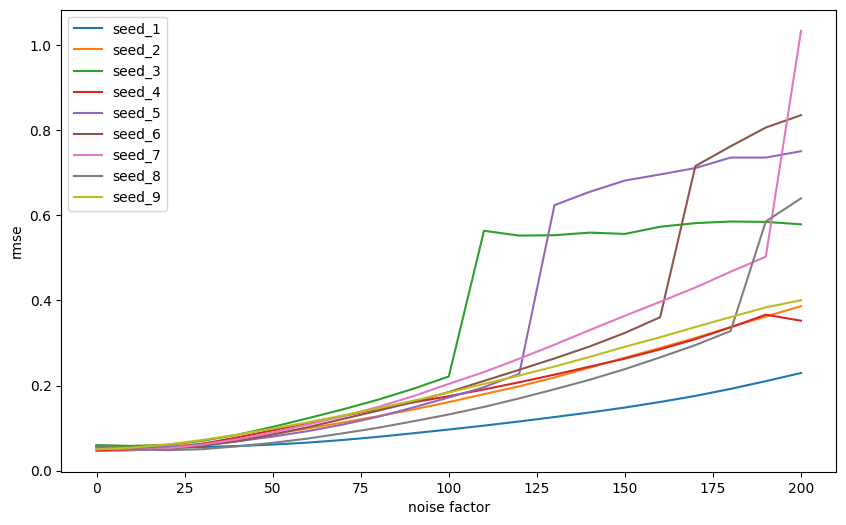

In [10]:
# plot the results
# x axis noise factor
# y axis rmse
fig, ax = plt.subplots(figsize=(10, 6))
for seed in range(max_seed):
    ax.plot(results[repr(seed)]['noise_factor'], results[repr(seed)]['rmse'], label=f'seed_{seed+1}')
ax.set_xlabel('noise factor')
ax.set_ylabel('rmse')
ax.legend()

In [11]:
results[repr(1)]['traj_steps']
results.keys

results_file_name = f'{notebook_dir}/../data/noise_results_{controller}.npy'
np.save(results_file_name, results)
print(f'saved {notebook_dir}/{results_file_name}')

saved /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting//home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting/../data/noise_results_fmpc.npy


In [14]:
# early stop
# results[repr(seed)]['early_stop']
# merge all the early stop
num_noise_factor = len(results[repr(seed)]['noise_factor'])
print('num_noise_factor', num_noise_factor)
early_stop_results = [False for _ in range(num_noise_factor)]
print('early_stop_results', early_stop_results)
print('len(early_stop_results)', len(early_stop_results))
for seed in range(max_seed):
    for i in range(len(results[repr(seed)]['noise_factor'])):
        print(i)
        early_stop_results[i] = early_stop_results[i] or results[repr(seed)]['early_stop'][i][0]
print('early_stop_results', early_stop_results)
# find the first early stop
if True in early_stop_results:
    first_early_stop = early_stop_results.index(True)
    early_stop_noise_factor = results[repr(seed)]['noise_factor'][first_early_stop]
else:
    print('no early stop')
    first_early_stop = None
    early_stop_noise_factor = None
print('first_early_stop', first_early_stop)
print('early_stop_noise_factor', early_stop_noise_factor)

num_noise_factor 21
early_stop_results [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
len(early_stop_results) 21
0


TypeError: 'bool' object is not subscriptable

In [ ]:
early_stop_noise_factor = 


NameError: name 'early_stop_noise_factor' is not defined

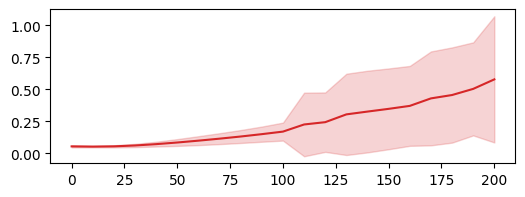

In [16]:
mean_rmse = np.mean([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)
std_rmse = np.std([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(results[repr(seed)]['noise_factor'], mean_rmse, 
        label='mean', color=plot_color[controller])
ax.fill_between(results[repr(seed)]['noise_factor'], mean_rmse- s*std_rmse, mean_rmse+ s*std_rmse, 
                alpha=0.2, label=f'{s} std', color=plot_color[controller])

# plot shaded area for the first early stop
ax.axvspan(early_stop_noise_factor, max_noise_factor, color='red', alpha=0.1, label='early stop')

ax.set_xlim([1, max_noise_factor])
ax.set_ylim([0, None])
# explicitly show the tick from 1 to the max noise factor
noise_ticks = [i for i in range(20, max_noise_factor+1, 20)]
# append 1 at the beginning
noise_ticks = [1] + noise_ticks
ax.set_xticks(noise_ticks)
# plot y line at 0.1
ax.axhline(y=0.1, color='gray', linestyle='--', label='RMSE = 0.1')
ax.legend(ncol=2)
ax.set_xlabel('Noise amplification factor')
ax.set_ylabel('RMSE')
ax.set_title(f'RMSE of {controller} with amplified noise')

mean_rmse[0]

In [129]:

# traj_results = {}
# for seed in range(max_seed):
#     # re-arrange the traj data to be in shape (noise_factor, max_steps, obs_dim)
#     for i in range(1, max_noise_factor, 20):
#         traj_data = np.zeros((len(traj_data_list), max_steps, obs_dim))
#         for i in range(len(traj_data_list)):
#             traj_data[i] = traj_data_list[i]
#     traj_results[repr(seed)] = results[repr(seed)]['traj_data']


#     for i in range(0, len(traj_data), 40):
#         ax.plot(traj_data[:, 0], traj_data[:, 2], label=f'seed_{seed+1}')
# fig, ax = plt.subplots(figsize=(10, 6))
# # plot the traj every 40 noise factor